```
Run-length encoding (RLE): a lossless data compression.
Eg 1. A simple example 
 - sequence : AAAAAACCCBBBBBBAAAFFFFF
 -> Using run-length encoding, we can represent it as A6C3B6A3F5
The 23 length sequence was compressed to a 10 length sequence.

Eg 2. Refer to below code
```

In [1]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import pyplot

## 1. Image of 1 - mask and 0 -background

img.shape = (8, 6)


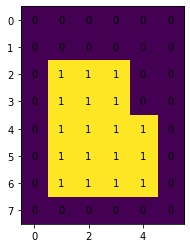

In [2]:
grid = [ [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 0, 0],
         [0, 1, 1, 1, 0, 0],
         [0, 1, 1, 1, 1, 0],
         [0, 1, 1, 1, 1, 0],
         [0, 1, 1, 1, 1, 0],    
         [0, 0, 0, 0, 0, 0] ]

img = np.asarray(grid)
print(f'img.shape = {img.shape}')
fig, ax = pyplot.subplots(1)
for (j, i), label in np.ndenumerate(grid):
    ax.text(i, j, label, ha='center', va='center')
plt.imshow(img)
plt.show()

In [3]:
img

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

## 2. Run Length Encoding

In [4]:
def rle_encode(img):
    '''
    :param: img: numpy array (1 - mask, 0 - background)
        Eg. img = array([[0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0],
                         [0, 1, 1, 1, 0, 0],
                         [0, 1, 1, 1, 0, 0],
                         [0, 1, 1, 1, 1, 0],
                         [0, 1, 1, 1, 1, 0],
                         [0, 1, 1, 1, 1, 0],
                         [0, 0, 0, 0, 0, 0]])        
    Returns: run length as string formated
        Eg. '14 3 20 3 26 4 32 4 38 4'
    '''
    # flattern multi-dimensional array to 1D array
    pixels = img.flatten()
    # Add 0 at the start and end of 1D array
    pixels = np.concatenate([[0], pixels, [0]])
    
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

#### test rle_encode()

In [5]:
rle_encode(img)  # refer to the above image 
                 # scan row by row

'14 3 20 3 26 4 32 4 38 4'

## 3. Run Length Decode

In [6]:
def rle_decode(mask_rle, shape):
    '''
    :param: mask_rle: run-length as string formated (start length)       
    :param: shape: (height, width) of array to return         
    Returns: numpy array, 1 - mask, 0 - background
    Usage: 
        array = rle_decode(mask_rle = '14 3 20 3 26 4 32 4 38 4', 
                           shape = (8, 6))
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype = np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = 1
    return img.reshape(shape)

#### test rle_decode()

In [7]:
rle_decode(mask_rle = '14 3 20 3 26 4 32 4 38 4', shape = (8, 6))

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

### Test code

In [8]:
pixels = np.concatenate([[0], [1, 1, 0, 0, 0, 1], [0]])
print(pixels)
print(pixels[1:])
print(pixels[:-1])
print(pixels[1:] != pixels[:-1])
print(np.where(pixels[1:] != pixels[:-1]))
print(np.where(pixels[1:] != pixels[:-1])[0])
print(np.where(pixels[1:] != pixels[:-1])[0] + 1)
runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
print(runs[1::2])
print(runs[::2])
print(type(runs))

runs[1::2] -= runs[::2]
print(runs)

[0 1 1 0 0 0 1 0]
[1 1 0 0 0 1 0]
[0 1 1 0 0 0 1]
[ True False  True False False  True  True]
(array([0, 2, 5, 6], dtype=int64),)
[0 2 5 6]
[1 3 6 7]
[3 7]
[1 6]
<class 'numpy.ndarray'>
[1 2 6 1]


In [9]:
mask_rle = '14 3 20 3 26 4 32 4 38 4'
s = mask_rle.split()
s

['14', '3', '20', '3', '26', '4', '32', '4', '38', '4']

In [10]:
starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
starts, lengths

(array([14, 20, 26, 32, 38]), array([3, 3, 4, 4, 4]))

In [11]:
starts -= 1
starts

array([13, 19, 25, 31, 37])

In [12]:
ends = starts + lengths
ends

array([16, 22, 29, 35, 41])